In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import random 


In [2]:
df = pd.read_csv("./pheno_terpenoids.tsv",sep="\t",index_col=0)
df.head()

,wf,thrips,5.541_67.0557,7.060_95.0168,9.272_93.0728,9.472_91.0566,9.653_91.0565,10.148_93.0730,10.581_105.0363,10.873_119.0877,...,26.529_131.0872,26.595_91.0568,26.689_109.1032,26.803_111.0836,26.833_81.0727,27.083_97.0317,27.996_91.0565,28.382_97.0323,30.160_91.0569,32.503_159.8606
sample,,,,,,,,,,,,,,,,,,,,,
S lyc MM,non-toxic,non-toxic,0.00000,0.0,0.0000,0.000000,88210.77165,0.00000,0.0,32617.13711,...,0.0,0.000,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0
S hua LA1364,non-toxic,non-toxic,0.00000,0.0,104528.7520,45335.466500,27304.44693,90430.09761,0.0,0.00000,...,0.0,0.000,0.0,5561.18023,0.00000,0.0,0.0,0.0,0.0,0.0
S pim LA1578,non-toxic,non-toxic,12809.66965,0.0,0.0000,0.000000,221391.28520,0.00000,0.0,24737.81096,...,0.0,0.000,0.0,9495.49648,0.00000,0.0,0.0,0.0,0.0,0.0
S hab LA1718,toxic,non-toxic,0.00000,0.0,0.0000,0.000000,436434.76200,0.00000,0.0,0.00000,...,0.0,121073.917,0.0,0.00000,15089.64365,0.0,0.0,0.0,0.0,0.0
S chm LA1840,non-toxic,non-toxic,0.00000,0.0,13354.2292,7006.160718,138245.88960,18838.74620,0.0,0.00000,...,0.0,0.000,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0


# Whitefly analysis

## get the X and y arrays

In [3]:
# get whitefly classes
y = df["thrips"].tolist()
stratify_info = df['thrips'].map({'non-toxic': 0, 'toxic': 1})

# get matrix X of volatile values
X = df.iloc[:,2:]
X.head()

,5.541_67.0557,7.060_95.0168,9.272_93.0728,9.472_91.0566,9.653_91.0565,10.148_93.0730,10.581_105.0363,10.873_119.0877,11.056_91.0567,11.572_91.0564,...,26.529_131.0872,26.595_91.0568,26.689_109.1032,26.803_111.0836,26.833_81.0727,27.083_97.0317,27.996_91.0565,28.382_97.0323,30.160_91.0569,32.503_159.8606
sample,,,,,,,,,,,,,,,,,,,,,
S lyc MM,0.00000,0.0,0.0000,0.000000,88210.77165,0.00000,0.0,32617.13711,0.0,0.00000,...,0.0,0.000,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0
S hua LA1364,0.00000,0.0,104528.7520,45335.466500,27304.44693,90430.09761,0.0,0.00000,0.0,624085.81700,...,0.0,0.000,0.0,5561.18023,0.00000,0.0,0.0,0.0,0.0,0.0
S pim LA1578,12809.66965,0.0,0.0000,0.000000,221391.28520,0.00000,0.0,24737.81096,0.0,0.00000,...,0.0,0.000,0.0,9495.49648,0.00000,0.0,0.0,0.0,0.0,0.0
S hab LA1718,0.00000,0.0,0.0000,0.000000,436434.76200,0.00000,0.0,0.00000,0.0,0.00000,...,0.0,121073.917,0.0,0.00000,15089.64365,0.0,0.0,0.0,0.0,0.0
S chm LA1840,0.00000,0.0,13354.2292,7006.160718,138245.88960,18838.74620,0.0,0.00000,0.0,34923.75849,...,0.0,0.000,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0


## Define function to run the Random Forest 

In [4]:
# define main random forest routine.. uses 6 splits to partition data
from sklearn.metrics import classification_report

def single_run(X,y,rs,disp=False,nb_of_splits = 6,nb_of_trees=1000):
    """
    This function takes a feature matrix (X) and a label array (y) and fits 
    a number of random forest classifier based on the specified number of splits. 
    """

    number_of_splits = nb_of_splits
    
    # create dataframes to accomodate computed values for each variable importance + real/predicted y values
    variableImportance = pd.DataFrame(np.zeros([X.shape[1],number_of_splits]))    
    dfy = pd.DataFrame(y,columns=['tox'])
    yhat = pd.DataFrame(['']*len(y),columns=['predict_tox'],dtype=np.str)
    
    # Stratified K-fold cross validator: provides train/test indices to split data in train/test sets
    kfold = StratifiedKFold(n_splits=number_of_splits,random_state=rs)
    
    splitnr = 0
    
    # Splits the X and y arrays n times (as specified by number of splits)
    # Initialise a Random Forest classifier with the specified number of trees and using class weights. 
    # Random state is fixed so that results are reproducible from run to run.
    for train_index, test_index in kfold.split(X,y):
        nt = 1/sum(stratify_info[train_index]==0) # calculates a weight for the non-toxic class (corrects for class imbalance)
        tx = 1/sum(stratify_info[train_index]==1) # calculates a weight for the toxic class (corrects for class imbalance)   
        rf = RandomForestClassifier(n_estimators=nb_of_trees,
                                    class_weight={"toxic":tx,"non-toxic":nt},
                                    random_state=rs)

        rf = rf.fit(X.iloc[train_index,:],dfy.iloc[train_index].values.ravel())

        # predict class values
        y_pred = rf.predict(X.iloc[test_index,:])
        for j in range(len(y_pred)):    
            yhat.iloc[test_index[j]] = y_pred[j]    
                  
        variableImportance.iloc[:,splitnr] = rf.feature_importances_
        splitnr+=1
        
    if disp:
        print(classification_report(y, yhat))
        pdata = variableImportance.copy()
        pdata.rename(columns={i:'split{0}'.format(i) for i in range(6)},inplace=True)
        pdata['x'] = range(variableImportance.shape[0])
        pdata.head()
        sns.lineplot(data=pdata)
    
    return [variableImportance,yhat]

## Extract feature importance from the RF runs

In [5]:
feature_importance=pd.DataFrame(columns=['run{0}'.format(i+1) for i in range(5)])
feature_importance_sd=pd.DataFrame(columns=['run{0}'.format(i+1) for i in range(5)])

yhat = pd.DataFrame(columns=['run{0}'.format(i+1) for i in range(5)])

#run the normal procedure 5 times with different seeds
#concatenate the predicted y's and the feature importance for analysis later
for i in range(5):
    vi,yh = single_run(X,y,i,False)
    
    feature_importance.iloc[:,i] = vi.mean(axis=1)
    feature_importance_sd.iloc[:,i] = vi.std(axis=1)
    yhat.iloc[:,i]=yh.iloc[:,0]


In [6]:
# determine the average en std deviations 
mean_varimportance = feature_importance.mean(axis=1)
# sum the variances (=squared std) and then take the mean
pooled_std = np.sqrt((feature_importance_sd**2).mean(axis=1))

# create panda for convenience
yerr = pd.concat([mean_varimportance-2*pooled_std, mean_varimportance,mean_varimportance+2*pooled_std],axis=1)

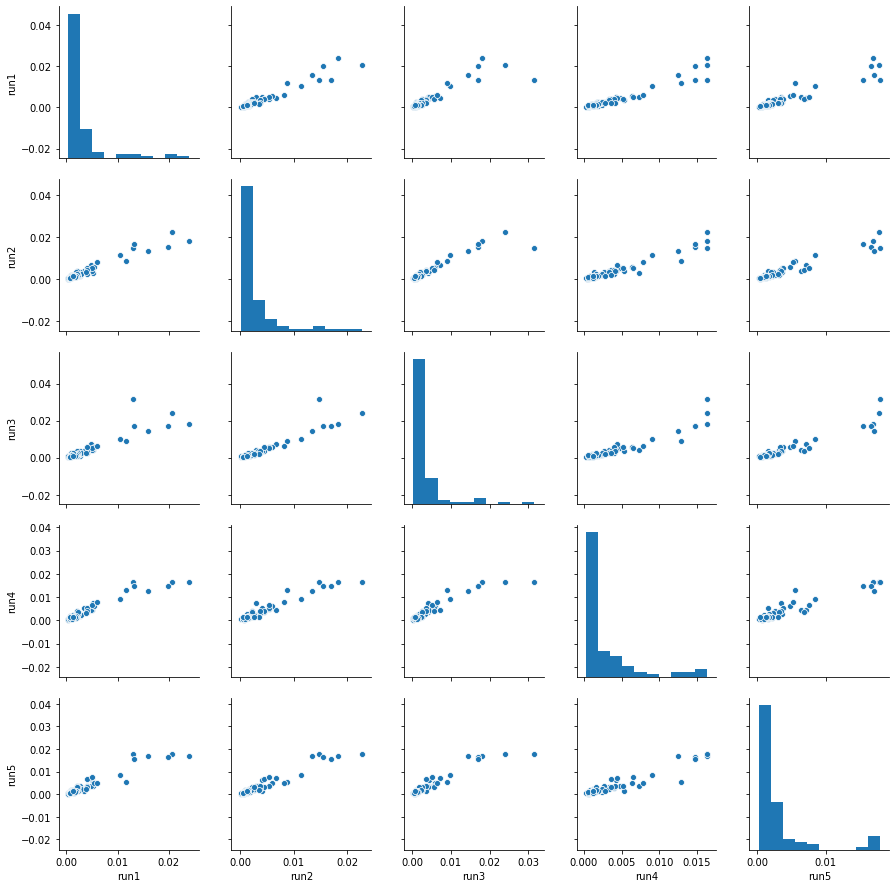

In [7]:
# plot the variable importances for each run and compare them to each other -> gives idea of stability 
sns.pairplot(data=feature_importance_sd)

# Permutations to extract p-values for each feature importance

In [8]:
nrperm = 100
yperms = pd.DataFrame(columns=['perm{0}'.format(i+1) for i in range(nrperm)])
secure_random = random.SystemRandom()

In [9]:
feature_importance_perm=pd.DataFrame(columns=['perm{0}'.format(i+1) for i in range(nrperm)])
yhat_perm=pd.DataFrame(columns=['perm{0}'.format(i+1) for i in range(nrperm)])

# create dataframe with y vector
dfy = pd.DataFrame(y,columns=['tox'])


for perm in range(nrperm):    
    # generate random numbers
    randomfloat = [secure_random.random() for r in range(len(y))]
    # create new ynew matrix
    ynew = dfy.iloc[np.argsort(randomfloat)]
    # reindex the vector
    ynew.index = range(len(y))
    # store this matrix for later
    yperms.iloc[:,perm]=ynew.iloc[:,0].copy()
    
    # set to fixed seed 1234 (arbitraryly)
    a,yh = single_run(X,ynew,1234,False)
    feature_importance_perm.iloc[:,perm] = a.mean(axis=1)
    yhat_perm.iloc[:,perm]=yh.iloc[:,0]
    

In [10]:
# routine to determine pvalue of average value (x) based on results scored by random generated data (X)
def iperc(x,X):
    
    df = pd.DataFrame(index=X.index,columns=['p-value'])
    
    for i in range(len(x)):            
        pn = sum(X.iloc[i,:]<x.iloc[i])/X.shape[0]
        pp = sum(X.iloc[i,:]>=x.iloc[i])/X.shape[0]
    
        df.iloc[i] = min(pn,pp)
            
    return df
    

In [11]:
# create some pandas just for plotting 
minp = feature_importance_perm.min(axis=1)
maxp = feature_importance_perm.max(axis=1)

yerr_plot = pd.concat([minp, mean_varimportance,maxp],axis=1)
yerr_plot.columns = ['min_perm','avg','max_perm']
yerr_plot['sig']=(minp>mean_varimportance) | (maxp<mean_varimportance)
yerr_plot['x'] = range(yerr.shape[0])

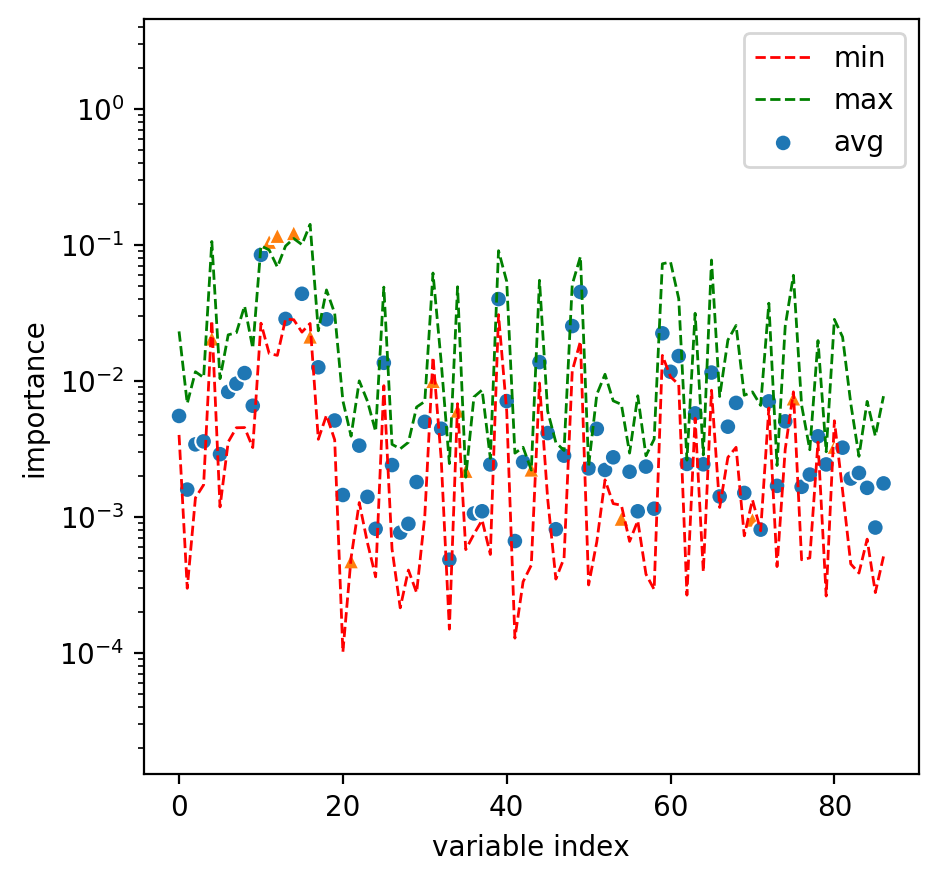

In [12]:
fig,ax = plt.subplots(figsize=([5,5]),dpi=200)
ax.set(yscale='log')
sns.scatterplot(x='x',y='avg',data=yerr_plot,markers=['o','^'],hue='sig',style='sig')
sns.lineplot(x='x',y='min_perm',data=yerr_plot,color='red')
sns.lineplot(x='x',y='max_perm',data=yerr_plot,color='green')

ax.lines[0].set_linestyle('--')
ax.lines[0].set_linewidth(1)

ax.lines[1].set_linestyle('--')
ax.lines[1].set_linewidth(1)

plt.legend(['min','max','avg'])

plt.xlabel('variable index')
plt.ylabel('importance');


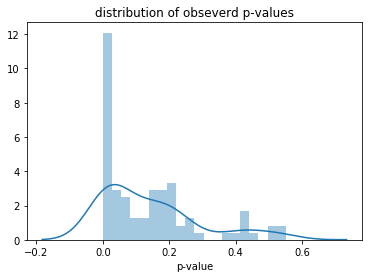

In [13]:
mi = mean_varimportance
pvalues = iperc(mi,feature_importance_perm)
sns.distplot(pvalues.iloc[:,0].astype('float'),20)
plt.title('distribution of obseverd p-values');

In [35]:
pvalues.loc[pvalues['p-value']<0.05,:]

,p-value
4,0
11,0
12,0
13,0.0114943
14,0
16,0
21,0
25,0.0114943
26,0.045977
31,0


In [15]:
# only select those variables that have p-value smaller than 0.05 (after bonferroni correction)
#mysel = pvalues.loc[pvalues.iloc[:,0]<(0.05/X.shape[0]),:].sort_values('p-value')
mysel = pvalues.loc[pvalues.iloc[:,0]<0.05,:].sort_values('p-value')

/Users/mgalland/miniconda3/envs/rf/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  app.launch_new_instance()


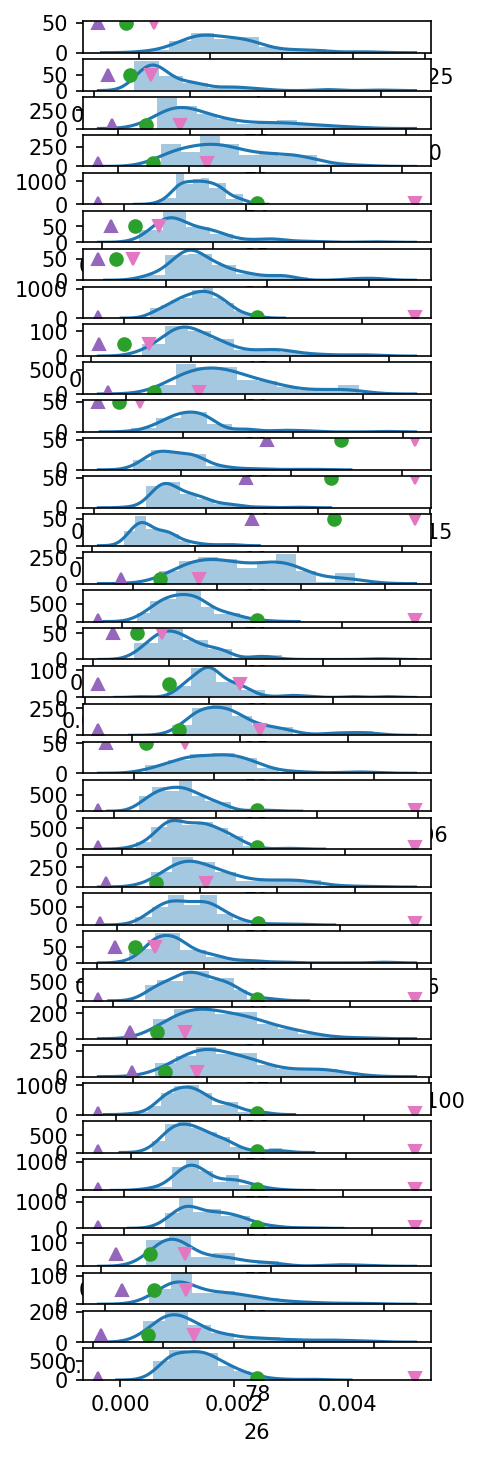

In [16]:
# plot those variables
nrplots = len(mysel.index.values)
fig = plt.figure(figsize=([3,12]),dpi=150)
ax = fig.subplots(nrows=nrplots,ncols=1)

yerr = pd.concat([mean_varimportance-2*pooled_std, mean_varimportance,mean_varimportance+2*pooled_std],axis=1)

for i in range(nrplots):                
    plt.subplot(ax[i])
    sns.distplot(feature_importance_perm.iloc[mysel.index.values[i],:],bins=10,ax=ax[i])
    plt.plot(mi[mysel.index.values[i]],0,mi[mysel.index.values[i]],50,'o')
    plt.plot(yerr.iloc[mysel.index.values[i],0],0,yerr.iloc[mysel.index.values[i],0],50,'^')
    plt.plot(yerr.iloc[mysel.index.values[i],2],0,yerr.iloc[mysel.index.values[i],2],50,'v')

    
plt.tight_layout()

# Write final results to file

In [17]:
df.head()

,wf,thrips,5.541_67.0557,7.060_95.0168,9.272_93.0728,9.472_91.0566,9.653_91.0565,10.148_93.0730,10.581_105.0363,10.873_119.0877,...,26.529_131.0872,26.595_91.0568,26.689_109.1032,26.803_111.0836,26.833_81.0727,27.083_97.0317,27.996_91.0565,28.382_97.0323,30.160_91.0569,32.503_159.8606
sample,,,,,,,,,,,,,,,,,,,,,
S lyc MM,non-toxic,non-toxic,0.00000,0.0,0.0000,0.000000,88210.77165,0.00000,0.0,32617.13711,...,0.0,0.000,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0
S hua LA1364,non-toxic,non-toxic,0.00000,0.0,104528.7520,45335.466500,27304.44693,90430.09761,0.0,0.00000,...,0.0,0.000,0.0,5561.18023,0.00000,0.0,0.0,0.0,0.0,0.0
S pim LA1578,non-toxic,non-toxic,12809.66965,0.0,0.0000,0.000000,221391.28520,0.00000,0.0,24737.81096,...,0.0,0.000,0.0,9495.49648,0.00000,0.0,0.0,0.0,0.0,0.0
S hab LA1718,toxic,non-toxic,0.00000,0.0,0.0000,0.000000,436434.76200,0.00000,0.0,0.00000,...,0.0,121073.917,0.0,0.00000,15089.64365,0.0,0.0,0.0,0.0,0.0
S chm LA1840,non-toxic,non-toxic,0.00000,0.0,13354.2292,7006.160718,138245.88960,18838.74620,0.0,0.00000,...,0.0,0.000,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0


In [18]:
#df_signif = df[]
signif = pvalues.loc[pvalues['p-value']<0.05,:]
signif.index.values

array([ 4, 11, 12, 13, 14, 16, 21, 25, 26, 31, 34, 35, 36, 37, 38, 40, 42,
       43, 47, 50, 52, 54, 55, 56, 57, 60, 62, 63, 64, 70, 71, 72, 75, 78,
       79, 80])

In [19]:
X.iloc[:,signif.index.values]

,9.653_91.0565,11.96_91.0560,12.373_91.0575,12.618_119.0885,12.761_91.0557,13.604_105.0725_blank,15.562_91.0570,20.614_58.0433,21.112_119.0858,22.444_161.1317,...,25.421_119.0869,25.508_105.0726,25.516_145.0981,25.842_161.1316,25.911_105.0725,25.968_119.0881,26.200_105.0726,26.595_91.0568,26.689_109.1032,26.803_111.0836
sample,,,,,,,,,,,,,,,,,,,,,
S lyc MM,88210.77165,1.063858e+05,2.398896e+05,4.837844e+05,1.089088e+06,4.806852e+05,0.00000,0.000000e+00,0.00,22997.336300,...,0.00,0.000000e+00,0.0,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,0.000,0.000000
S hua LA1364,27304.44693,5.708874e+06,2.234296e+06,6.545401e+04,2.965537e+06,1.573282e+05,0.00000,0.000000e+00,0.00,25381.570760,...,0.00,7.297318e+03,0.0,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,0.000,5561.180230
S pim LA1578,221391.28520,3.686782e+05,2.439502e+05,3.170337e+05,1.204559e+06,3.139966e+05,0.00000,0.000000e+00,0.00,41352.763250,...,0.00,0.000000e+00,0.0,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,0.000,9495.496480
S hab LA1718,436434.76200,1.618101e+06,1.021207e+06,7.487660e+05,5.001489e+06,4.814509e+05,0.00000,1.220284e+04,0.00,0.000000,...,0.00,1.698050e+05,0.0,58754.53478,24628.87436,329976.54290,7.715531e+04,1.210739e+05,0.000,0.000000
S chm LA1840,138245.88960,3.048041e+05,6.074285e+04,6.125113e+04,2.236052e+05,1.751798e+05,0.00000,0.000000e+00,0.00,0.000000,...,0.00,0.000000e+00,0.0,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,0.000,0.000000
S per LA1954,250109.37630,3.262798e+04,1.208299e+04,1.409480e+05,2.185935e+04,3.947960e+05,0.00000,0.000000e+00,0.00,13428.255710,...,0.00,0.000000e+00,0.0,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,0.000,0.000000
S neo LA2133,186481.80970,1.625238e+05,1.066427e+05,1.238730e+05,3.909971e+05,2.515798e+05,0.00000,0.000000e+00,0.00,0.000000,...,0.00,0.000000e+00,0.0,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,0.000,0.000000
S lyc LA4024,159868.57710,2.109712e+06,2.677913e+06,1.843567e+05,5.876487e+06,1.597800e+05,14292.77153,0.000000e+00,0.00,80029.878560,...,0.00,0.000000e+00,0.0,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,0.000,26859.676500
S neo LA0735,70557.38507,1.345353e+05,6.000653e+04,1.125782e+05,3.434927e+05,2.725011e+05,0.00000,0.000000e+00,0.00,0.000000,...,0.00,0.000000e+00,0.0,0.00000,0.00000,6042.62547,1.984416e+04,0.000000e+00,0.000,0.000000


## Sort dataframe by phenotypic class
To display a heatmap that shows the rows of the non-toxic genotypes followed by the rows of the toxic genotypes.

In [20]:
df_sorted = df.sort_values(by=["thrips"])

# make a new column containing the accession and phenotypic class
df_sorted["genotypes and class"] = df_sorted.index.values + "_" + df_sorted["thrips"]
df_sorted = df_sorted.set_index(df_sorted["genotypes and class"])

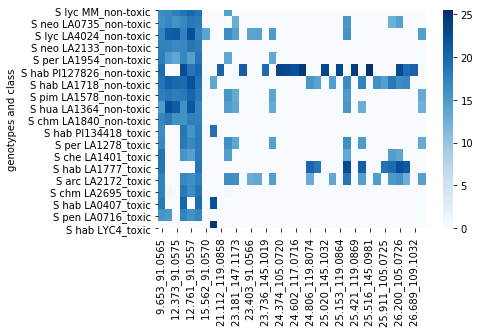

In [21]:
# X matrix similar to the one used for the Random Forest analysis (rows are reordered, not columns)
X = df_sorted.iloc[:,2:]

# add one for log offset
X_disp = X.replace(0,1) 

# display heatmap of log2(values)
log_function = lambda x: np.log2(x)
sns.heatmap(X_disp.iloc[:,signif.index.values].apply(log_function),cmap="Blues")

In [22]:
# filter to keep only significant metabolites
X_filt = X.iloc[:,signif.index.values]

# Make plots for each candidate summing over the class

In [23]:
# insert a column with the genotype + class
X_filt.insert(loc=0,column="id",value=X_filt.index.values)

In [24]:
X_filt.head()

,id,9.653_91.0565,11.96_91.0560,12.373_91.0575,12.618_119.0885,12.761_91.0557,13.604_105.0725_blank,15.562_91.0570,20.614_58.0433,21.112_119.0858,...,25.421_119.0869,25.508_105.0726,25.516_145.0981,25.842_161.1316,25.911_105.0725,25.968_119.0881,26.200_105.0726,26.595_91.0568,26.689_109.1032,26.803_111.0836
genotypes and class,,,,,,,,,,,,,,,,,,,,,
S lyc MM_non-toxic,S lyc MM_non-toxic,88210.77165,1.063858e+05,2.398896e+05,483784.3882,1.089088e+06,480685.2022,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0000
S neo LA0735_non-toxic,S neo LA0735_non-toxic,70557.38507,1.345353e+05,6.000653e+04,112578.2418,3.434927e+05,272501.0760,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6042.62547,19844.16286,0.0,0.0,0.0000
S lyc LA4024_non-toxic,S lyc LA4024_non-toxic,159868.57710,2.109712e+06,2.677913e+06,184356.7128,5.876487e+06,159780.0319,14292.77153,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,26859.6765
S neo LA2133_non-toxic,S neo LA2133_non-toxic,186481.80970,1.625238e+05,1.066427e+05,123872.9562,3.909971e+05,251579.8111,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0000
S per LA1954_non-toxic,S per LA1954_non-toxic,250109.37630,3.262798e+04,1.208299e+04,140948.0449,2.185935e+04,394795.9889,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0000


In [25]:
# new data frame with split value columns 
new = X_filt["id"].str.split("_", n = 1, expand = True) 
  
# making separate last name column from new data frame 
X_filt.loc[:,"thrips"]= new[1]

# add index column
X_filt = X_filt.set_index("id")

/Users/mgalland/miniconda3/envs/rf/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/mgalland/miniconda3/envs/rf/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [27]:
toxic = X_filt.iloc[:,0:-1][X_filt["thrips"] == "toxic"].sum()

In [28]:
nontoxic = X_filt.iloc[:,0:-1][X_filt["thrips"] == "non-toxic"].sum()

In [29]:
# prepare a dataframe for plotting
sumByClass = pd.DataFrame({'toxic':toxic, 'non-toxic':nontoxic})
sumByClass = sumByClass.reset_index()
sumByClass.columns.values[0]="candidate"
sumByClass = sumByClass.melt(id_vars="candidate",var_name="class",value_name="value")

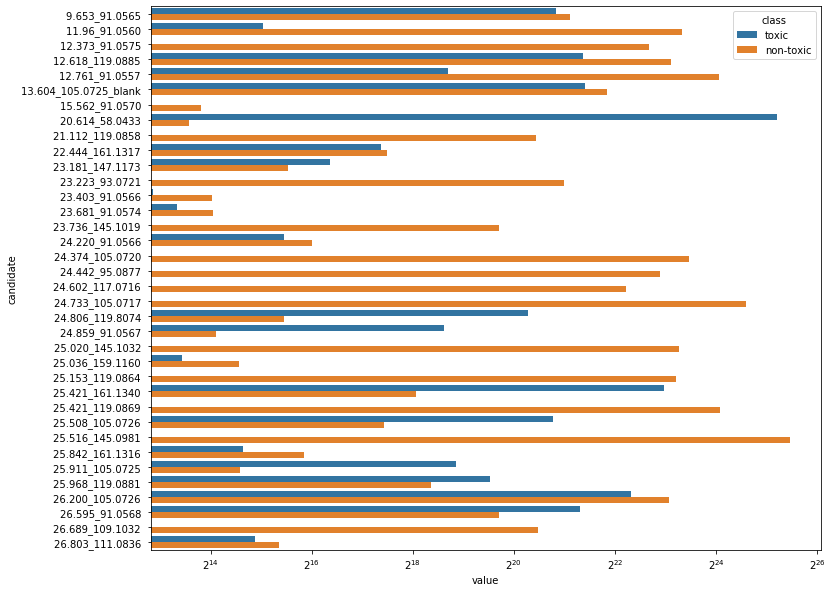

In [30]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_xscale("log",basex=2)
sns.barplot(x="value",y="candidate",hue="class",data=sumByClass,ax=ax)